<h2>Importing libraries

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

<h2>Reading data from a csv file

In [37]:
data=pd.read_csv('dataset.csv')

In [38]:
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [40]:
data.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [41]:
stats=data["Price"].describe().reset_index()
stats["Price"]= round(stats['Price'],2)
stats

,index,Price
0,count,14619.00
1,mean,538806.28
2,std,367229.36
3,min,78000.00
4,25%,320000.00
5,50%,450000.00
6,75%,645000.00
7,max,7700000.00


In [42]:
data.isna().sum().sum()

np.int64(0)

In [43]:
data.duplicated().sum()

np.int64(0)

In [44]:
data.dropna(inplace= True)
data.drop_duplicates(inplace=True)

In [45]:
data.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [46]:
x=data[['id','number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport']]
y=data['Price']


In [47]:
x

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport
0,6762810635,4,2.50,2920,4000,1.5,0,0,5,8,...,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51
1,6762810998,5,2.75,2910,9480,1.5,0,0,3,8,...,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53
2,6762812605,4,2.50,3310,42998,2.0,0,0,3,9,...,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76
3,6762812919,3,2.00,2710,4500,1.5,0,0,4,8,...,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51
4,6762813105,3,2.50,2600,4750,1.0,0,0,4,9,...,900,1951,0,122007,52.9133,-114.590,2380,4750,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,2,1.50,1556,20000,1.0,0,0,4,7,...,0,1957,0,122066,52.6191,-114.472,2250,17286,3,76
14615,6762830339,3,2.00,1680,7000,1.5,0,0,4,7,...,0,1968,0,122072,52.5075,-114.393,1540,7480,3,59
14616,6762830618,2,1.00,1070,6120,1.0,0,0,3,6,...,0,1962,0,122056,52.7289,-114.507,1130,6120,2,64
14617,6762830709,4,1.00,1030,6621,1.0,0,0,4,6,...,0,1955,0,122042,52.7157,-114.411,1420,6631,3,54


In [48]:
y

,Price
0,1400000
1,1200000
2,838000
3,805000
4,790000
...,...
14614,221700
14615,219200
14616,209000
14617,205000


<h3>Data split

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8)
x_train.shape

(11695, 21)

<h3>Average price by condition of the house

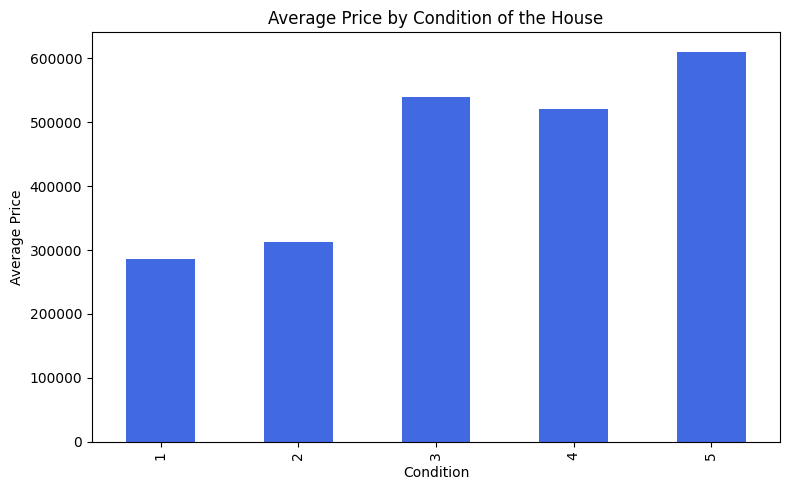

In [50]:
plt.figure(figsize=(8, 5))
data.groupby("condition of the house")["Price"].mean().plot(kind="bar", color='royalblue')
plt.title("Average Price by Condition of the House")
plt.xlabel("Condition")
plt.ylabel("Average Price")
plt.tight_layout()
plt.savefig("fig_avg_price_by_condition.png", dpi=300)
plt.show()

<h3>Features most influence the price

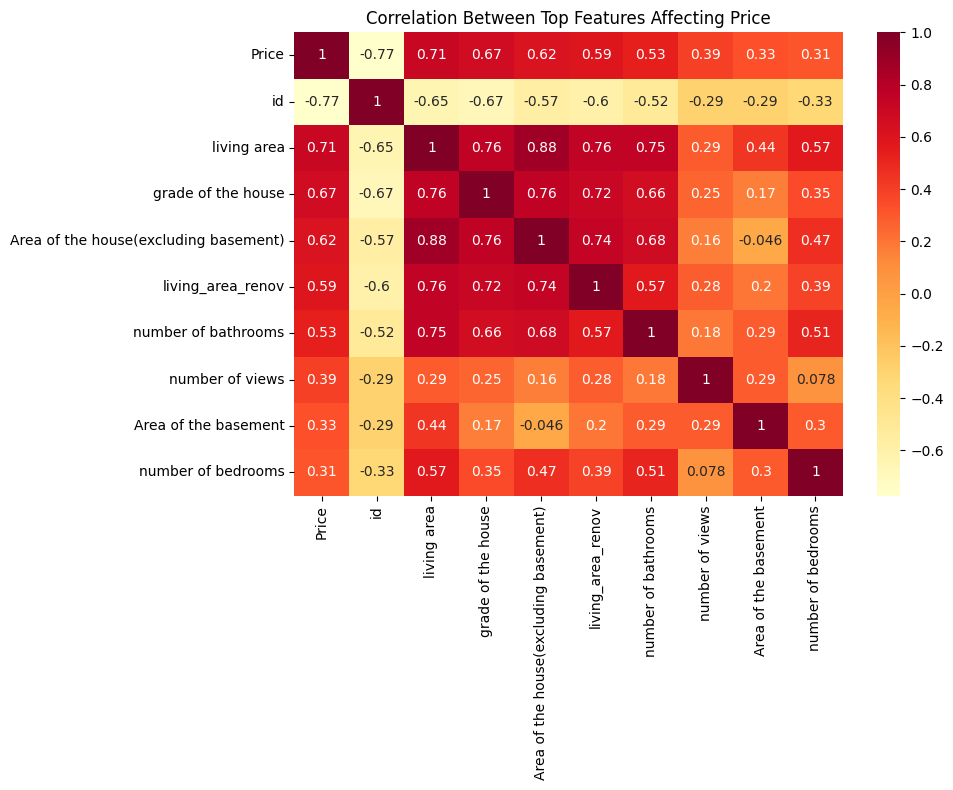

In [51]:
plt.figure(figsize=(10, 8))
top_corr = data.corr().abs()['Price'].sort_values(ascending=False).head(10).index
sns.heatmap(data[top_corr].corr(), annot=True, cmap='YlOrRd')
plt.title("Correlation Between Top Features Affecting Price")
plt.tight_layout()
plt.savefig("fig_top_corr_features_heatmap.png", dpi=300)
plt.show()


<h3>Distribution of key numeric features

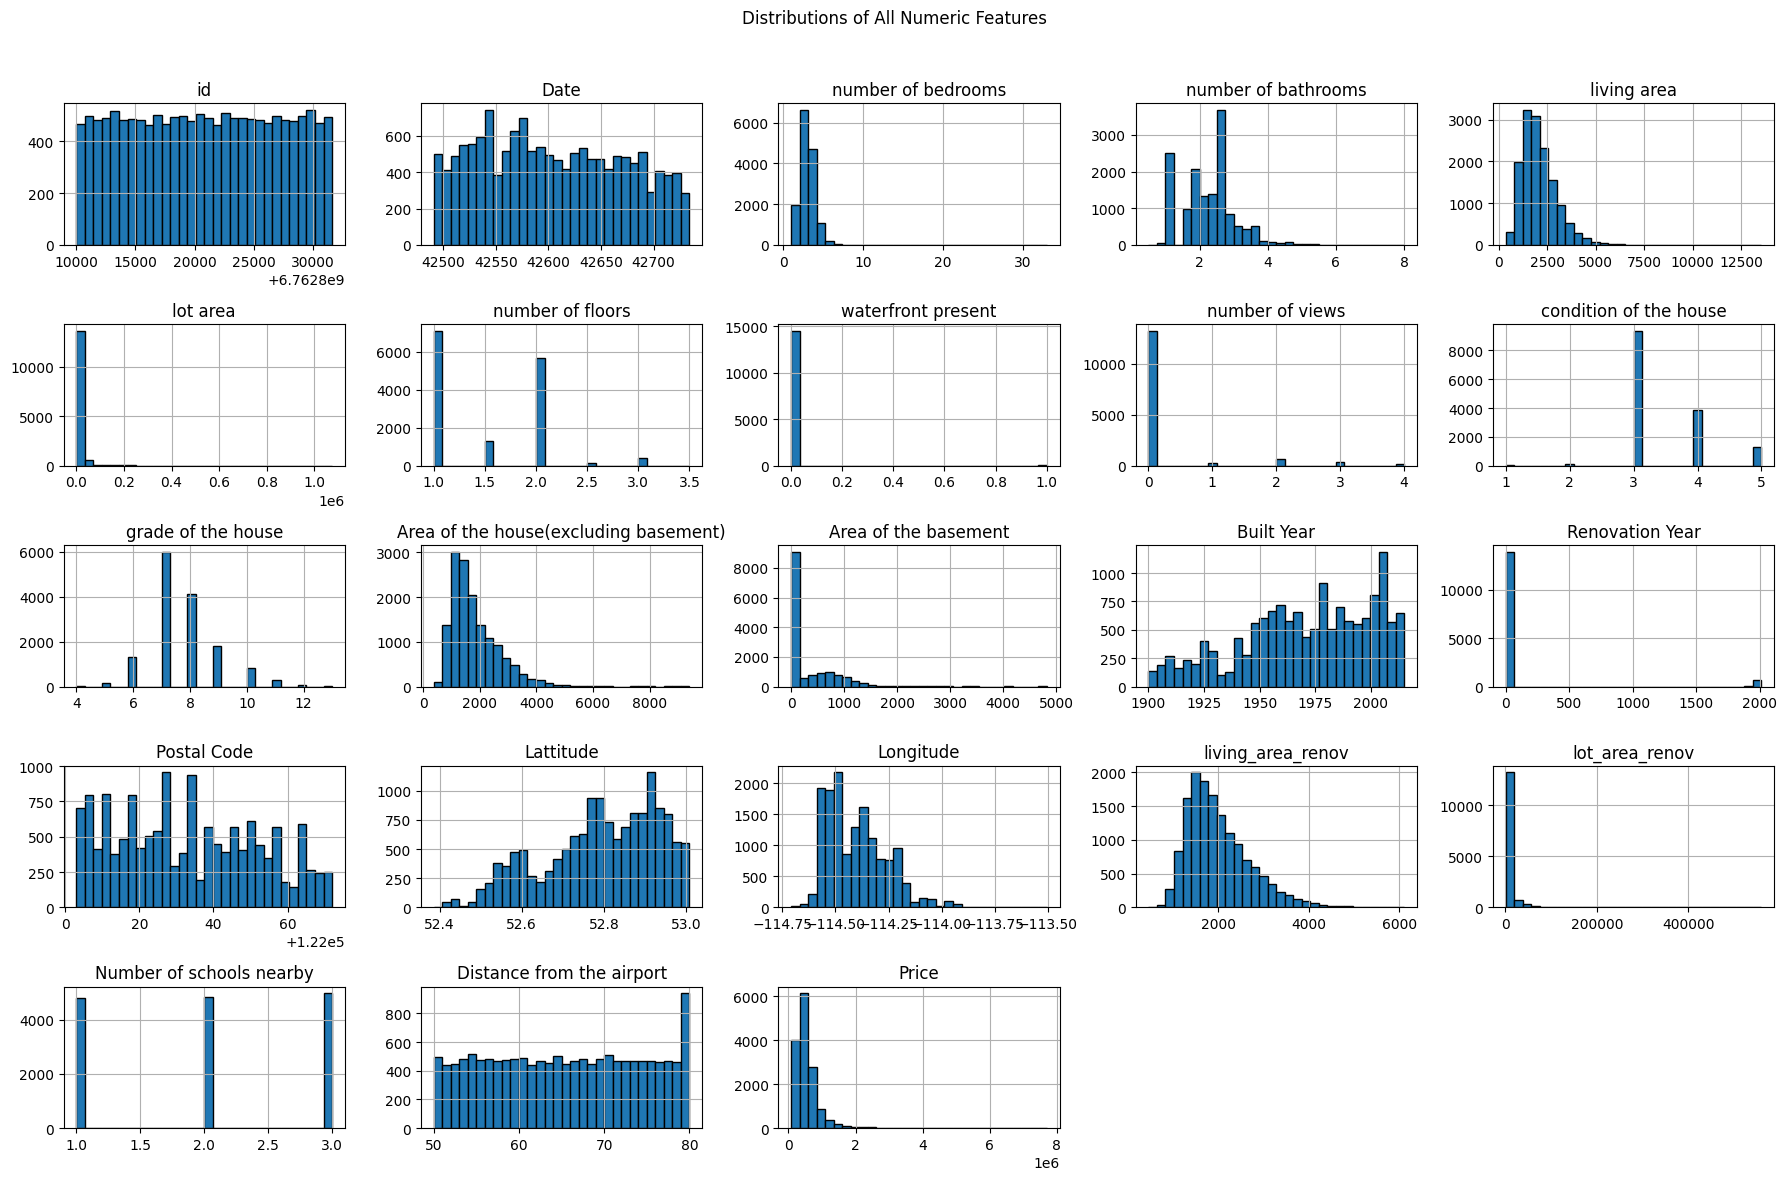

In [52]:
data.hist(figsize=(18, 12), bins=30, edgecolor='black')
plt.suptitle("Distributions of All Numeric Features")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("fig_numeric_distributions.png", dpi=300)
plt.show()


**<h2>Linear Regression Algorithm**

In [53]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
linear_r2_before = lr.score(x_test, y_test)
linear_preds_before = lr.predict(x_test)
linear_mae_before = mean_absolute_error(y_test, linear_preds_before)
linear_mse_before = mean_squared_error(y_test, linear_preds_before)
linear_rmse_before = np.sqrt(linear_mse_before)

In [54]:
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}
grid_lr = GridSearchCV(LinearRegression(), param_grid_lr)
grid_lr.fit(x_train, y_train)
linear_r2_after = grid_lr.score(x_test, y_test)
linear_preds_after = grid_lr.predict(x_test)
linear_mae_after = mean_absolute_error(y_test, linear_preds_after)
linear_mse_after = mean_squared_error(y_test, linear_preds_after)
linear_rmse_after = np.sqrt(linear_mse_after)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py", line 640, in fit
    self.coef_ = optimize.nnls(X,

**<h2> KNN**

In [55]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
knn_r2_before = knn.score(x_test, y_test)
knn_preds_before = knn.predict(x_test)
knn_mae_before = mean_absolute_error(y_test, knn_preds_before)
knn_mse_before = mean_squared_error(y_test, knn_preds_before)
knn_rmse_before = np.sqrt(knn_mse_before)

In [56]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn)
grid_knn.fit(x_train, y_train)
knn_r2_after = grid_knn.score(x_test, y_test)
knn_preds_after = grid_knn.predict(x_test)
knn_mae_after = mean_absolute_error(y_test, knn_preds_after)
knn_mse_after = mean_squared_error(y_test, knn_preds_after)
knn_rmse_after = np.sqrt(knn_mse_after)


**<h2>Decision Tree Regressor**

In [57]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
tree_r2_before = tree.score(x_test, y_test)
tree_preds_before = tree.predict(x_test)
tree_mae_before = mean_absolute_error(y_test, tree_preds_before)
tree_mse_before = mean_squared_error(y_test, tree_preds_before)
tree_rmse_before = np.sqrt(tree_mse_before)

In [58]:
param_grid_tree = {
    "criterion":["squared_error","friedman_mse", "absolute_error"],
    "splitter":["best","random"],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}
grid_tree = GridSearchCV(DecisionTreeRegressor(), param_grid_tree)
grid_tree.fit(x_train, y_train)
tree_r2_after = grid_tree.score(x_test, y_test)
tree_preds_after = grid_tree.predict(x_test)
tree_mae_after = mean_absolute_error(y_test, tree_preds_after)
tree_mse_after = mean_squared_error(y_test, tree_preds_after)
tree_rmse_after = np.sqrt(tree_mse_after)

**<h2>Random Forest Regressor**

In [59]:
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_r2_before = rfr.score(x_test, y_test)
rfr_preds_before = rfr.predict(x_test)
rfr_mae_before = mean_absolute_error(y_test, rfr_preds_before)
rfr_mse_before = mean_squared_error(y_test, rfr_preds_before)
rfr_rmse_before = np.sqrt(rfr_mse_before)

In [60]:
param_grid_rf = {
    "max_depth": [5, 10, 15],
    "n_estimators": [5, 10, 50, 100]
}
grid_rfr = GridSearchCV(RandomForestRegressor(), param_grid_rf)
grid_rfr.fit(x_train, y_train)
rfr_r2_after = grid_rfr.score(x_test, y_test)
rfr_preds_after = grid_rfr.predict(x_test)
rfr_mae_after = mean_absolute_error(y_test, rfr_preds_after)
rfr_mse_after = mean_squared_error(y_test, rfr_preds_after)
rfr_rmse_after = np.sqrt(rfr_mse_after)

**<h2>XGBRegressor**

In [61]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train)
xgb_r2_before = xgb.score(x_test, y_test)
xgb_preds_before = xgb.predict(x_test)
xgb_mae_before = mean_absolute_error(y_test, xgb_preds_before)
xgb_mse_before = mean_squared_error(y_test, xgb_preds_before)
xgb_rmse_before = np.sqrt(xgb_mse_before)

In [62]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1],
}
grid_xgb = GridSearchCV(XGBRegressor(), param_grid_xgb)
grid_xgb.fit(x_train, y_train)
xgb_r2_after = grid_xgb.score(x_test, y_test)
xgb_preds_after = grid_xgb.predict(x_test)
xgb_mae_after = mean_absolute_error(y_test, xgb_preds_after)
xgb_mse_after = mean_squared_error(y_test, xgb_preds_after)
xgb_rmse_after = np.sqrt(xgb_mse_after)

<ipython-input-63-4fdb4de91014>:16: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-63-4fdb4de91014>:17: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.savefig("fig_xgb_top_features.png", dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


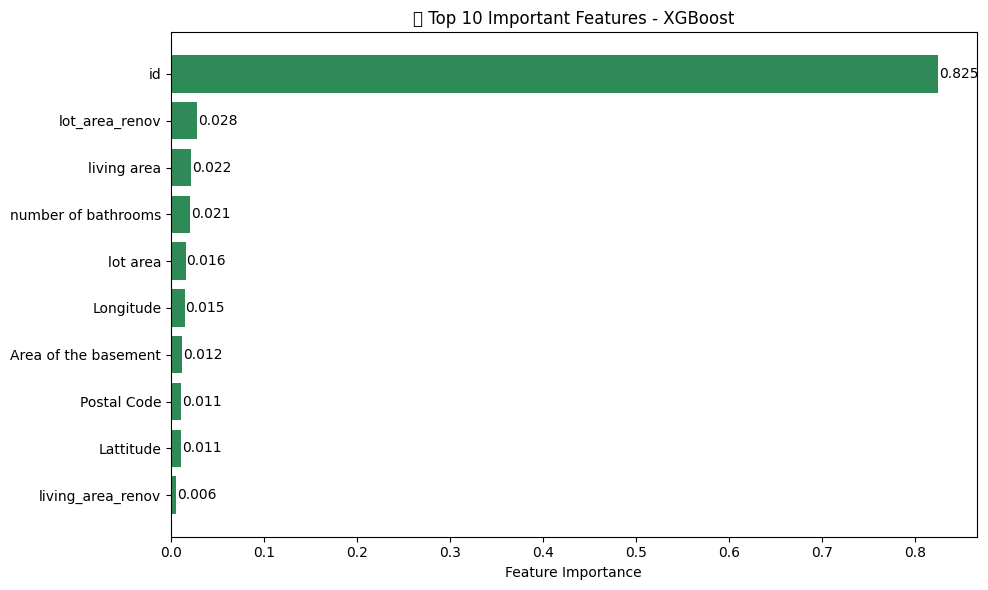

In [63]:
features = grid_xgb.best_estimator_.feature_names_in_
importances = grid_xgb.best_estimator_.feature_importances_

top_idx = np.argsort(importances)[-10:]
top_features = [features[i] for i in top_idx]
top_importances = importances[top_idx]

plt.figure(figsize=(10, 6))
bars = plt.barh(top_features, top_importances, color='seagreen')
plt.title("🎯 Top 10 Important Features - XGBoost")
plt.xlabel("Feature Importance")
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', va='center')
plt.tight_layout()
plt.savefig("fig_xgb_top_features.png", dpi=300)
plt.show()

In [64]:
import pandas as pd

# Create a summary table for all models
results = {
    'Model': [
        'Linear Regression (Before)', 'Linear Regression (After)',
        'KNN (Before)', 'KNN (After)',
        'Decision Tree (Before)', 'Decision Tree (After)',
        'XGBoost (Before)', 'XGBoost (After)',
        'Random Forest (Before)', 'Random Forest (After)'
    ],
    'Model Score': [
        linear_r2_before, linear_r2_after,
        knn_r2_before, knn_r2_after,
        tree_r2_before, tree_r2_after,
        xgb_r2_before, xgb_r2_after,
        rfr_r2_before, rfr_r2_after
    ],
    'MAE': [
        linear_mae_before, linear_mae_after,
        knn_mae_before, knn_mae_after,
        tree_mae_before, tree_mae_after,
        xgb_mae_before, xgb_mae_after,
        rfr_mae_before, rfr_mae_after
    ],
    'MSE': [
        linear_mse_before, linear_mse_after,
        knn_mse_before, knn_mse_after,
        tree_mse_before, tree_mse_after,
        xgb_mse_before, xgb_mse_after,
        rfr_mse_before, rfr_mse_after
    ],
    'RMSE': [
        linear_rmse_before, linear_rmse_after,
        knn_rmse_before, knn_rmse_after,
        tree_rmse_before, tree_rmse_after,
        xgb_rmse_before, xgb_rmse_after,
        rfr_rmse_before, rfr_rmse_after
    ]
}

results_df = pd.DataFrame(results)
print("\n📊 Regression Model Comparison:")
print(results_df.sort_values(by='Model Score', ascending=False).reset_index(drop=True))



📊 Regression Model Comparison:
                        Model  Model Score            MAE           MSE  \
0      Random Forest (Before)     0.959113   15873.399248  5.502995e+09   
1       Random Forest (After)     0.957925   15894.157680  5.662878e+09   
2             XGBoost (After)     0.951656   16736.833984  6.506606e+09   
3            XGBoost (Before)     0.921681   17004.947266  1.054102e+10   
4      Decision Tree (Before)     0.919729   19694.539330  1.080380e+10   
5       Decision Tree (After)     0.903631   21165.458675  1.297042e+10   
6                 KNN (After)     0.846762   31011.951726  2.062449e+10   
7                KNN (Before)     0.835124   32652.749795  2.219079e+10   
8   Linear Regression (After)     0.748926  100812.365624  3.379233e+10   
9  Linear Regression (Before)     0.748926  100812.365624  3.379233e+10   

            RMSE  
0   74182.171296  
1   75252.093030  
2   80663.536248  
3  102669.485399  
4  103941.330606  
5  113887.750729  
6  143612

In [65]:
import joblib

# Save all trained models (after tuning)
joblib.dump(grid_lr.best_estimator_, 'best_linear_regression_model.pkl')
joblib.dump(grid_knn.best_estimator_, 'best_knn_model.pkl')
joblib.dump(grid_tree.best_estimator_, 'best_decision_tree_model.pkl')
joblib.dump(grid_xgb.best_estimator_, 'best_xgb_model.pkl')
joblib.dump(grid_rfr.best_estimator_, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

**<h3>Predicting price by input**

In [66]:
import pandas as pd
import joblib

model = joblib.load('best_xgb_model.pkl')

In [67]:
def predict_and_compare(model_path, input_df, full_df, id_column='id', target_column='Price'):
    # Load the model
    model = joblib.load(model_path)

    # Make the prediction
    predicted_price = model.predict(input_df)[0]

    # Get the house ID from input
    house_id = input_df[id_column].values[0]

    # Check if actual price exists
    match = full_df[full_df[id_column] == house_id]

    print(f"🏠 House ID:         {house_id}")
    print(f"🔹 Predicted Price:  ${predicted_price:,.2f}")

    if not match.empty:
        actual_price = match[target_column].values[0]
        print(f"🔹 Actual Price:     ${actual_price:,.2f}")
        return {
            "house_id": house_id,
            "predicted_price": predicted_price,
            "actual_price": actual_price,
        }
    else:
        print("⚠️  Actual price not found in the dataset.")
        return {
            "house_id": house_id,
            "predicted_price": predicted_price,
            "actual_price": None,
        }

In [68]:
model_path = 'best_xgb_model.pkl'
full_df = pd.read_csv('dataset.csv')
input_df = pd.DataFrame([{
    'id': 6762810635,  # Make sure this matches a value in your original dataset
    'number of bedrooms': 4,
    'number of bathrooms': 2.5,
    'living area': 2920,
    'lot area': 4000,
    'number of floors': 1.5,
    'waterfront present': 0,
    'number of views': 0,
    'condition of the house': 5,
    'grade of the house': 8,
    'Area of the house(excluding basement)': 1910,
    'Area of the basement': 1010,
    'Built Year': 1909,
    'Renovation Year': 0,
    'Postal Code': 122004,
    'Lattitude': 52.8878,
    'Longitude': -114.47,
    'living_area_renov': 2470,
    'lot_area_renov': 4000,
    'Number of schools nearby': 2,
    'Distance from the airport': 51
}])
results = predict_and_compare(model_path, input_df, full_df)

🏠 House ID:         6762810635
🔹 Predicted Price:  $1,261,078.25
🔹 Actual Price:     $1,400,000.00


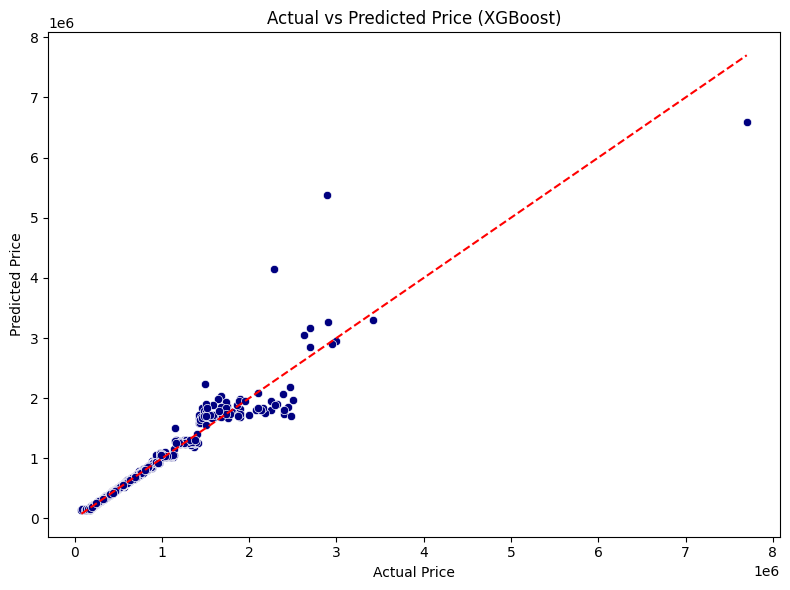

In [69]:


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=xgb_preds_after, color='navy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (XGBoost)")
plt.tight_layout()
plt.show()
